In [1]:
# Importing required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configuration to supress warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Reading the data set

df = pd.read_csv("Leads.csv")
df.head(10)

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified
5,2058ef08-2858-443e-a01f-a9237db2f5ce,660680,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,NaN,NaN,01.High,02.Medium,17.0,15.0,No,No,Modified
6,9fae7df4-169d-489b-afe4-0f3d752542ed,660673,Landing Page Submission,Google,No,No,1,2.0,1640,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,No,Modified
7,20ef72a2-fb3b-45e0-924e-551c5fa59095,660664,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Modified
8,cfa0128c-a0da-4656-9d47-0aa4e67bf690,660624,Landing Page Submission,Direct Traffic,No,No,0,2.0,71,2.0,...,No,NaN,Thane & Outskirts,02.Medium,02.Medium,14.0,14.0,No,Yes,Email Opened
9,af465dfc-7204-4130-9e05-33231863c4b5,660616,API,Google,No,No,0,4.0,58,4.0,...,No,NaN,Mumbai,02.Medium,02.Medium,13.0,16.0,No,No,Email Opened


In [4]:
df.shape

(9240, 37)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [6]:
df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


# Data Cleaning

In [7]:
# Checking if there are duplicates present under Prospect ID & Lead Number.

duplicate_prospect_ID = df.duplicated(subset = 'Prospect ID')
print (sum(duplicate_prospect_ID) == 0)   

True


In [8]:
duplicate_LeadNo = df.duplicated(subset = 'Lead Number')
print(sum(duplicate_LeadNo) == 0)

True


There are no duplicates present in Prospect ID & Lead Number, so we can drop these columns

In [9]:
# Removing Prospect ID & Lead Number from the data set
df.drop(['Prospect ID', 'Lead Number'],axis = 1, inplace = True)

In [10]:
# Checking null values in every column
df.isna().sum().sort_values(ascending=False)

Lead Quality                                     4767
Asymmetrique Activity Index                      4218
Asymmetrique Profile Score                       4218
Asymmetrique Profile Index                       4218
Asymmetrique Activity Score                      4218
Tags                                             3353
Lead Profile                                     2709
What matters most to you in choosing a course    2709
What is your current occupation                  2690
Country                                          2461
How did you hear about X Education               2207
Specialization                                   1438
City                                             1420
Page Views Per Visit                              137
TotalVisits                                       137
Last Activity                                     103
Lead Source                                        36
I agree to pay the amount through cheque            0
A free copy of Mastering The

In [11]:
# Converting the value 'Select' to Null
df = df.replace('Select', np.nan)

In [12]:
# Checking null values again
df.isna().sum().sort_values(ascending=False)

How did you hear about X Education               7250
Lead Profile                                     6855
Lead Quality                                     4767
Asymmetrique Activity Score                      4218
Asymmetrique Profile Score                       4218
Asymmetrique Profile Index                       4218
Asymmetrique Activity Index                      4218
City                                             3669
Specialization                                   3380
Tags                                             3353
What matters most to you in choosing a course    2709
What is your current occupation                  2690
Country                                          2461
TotalVisits                                       137
Page Views Per Visit                              137
Last Activity                                     103
Lead Source                                        36
Get updates on DM Content                           0
Update me on Supply Chain Co

In [13]:
# Percentage of Null values in every column
round(df.isna().sum().sort_values(ascending=False)/len(df)*100, 2)

How did you hear about X Education               78.46
Lead Profile                                     74.19
Lead Quality                                     51.59
Asymmetrique Activity Score                      45.65
Asymmetrique Profile Score                       45.65
Asymmetrique Profile Index                       45.65
Asymmetrique Activity Index                      45.65
City                                             39.71
Specialization                                   36.58
Tags                                             36.29
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
TotalVisits                                       1.48
Page Views Per Visit                              1.48
Last Activity                                     1.11
Lead Source                                       0.39
Get updates on DM Content                         0.00
Update me 

In [14]:
# Removing the columns that have more than 45% of missing values
columns =df.columns

for i in columns:
    if((100*(df[i].isnull().sum()/len(df.index))) >= 45):
        df.drop(i, axis = 1, inplace = True)

In [15]:
# Checking percentage of Null values again
round(df.isna().sum().sort_values(ascending=False)/len(df)*100, 2)

City                                             39.71
Specialization                                   36.58
Tags                                             36.29
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
TotalVisits                                       1.48
Page Views Per Visit                              1.48
Last Activity                                     1.11
Lead Source                                       0.39
Receive More Updates About Our Courses            0.00
Update me on Supply Chain Content                 0.00
Lead Origin                                       0.00
Digital Advertisement                             0.00
Get updates on DM Content                         0.00
I agree to pay the amount through cheque          0.00
A free copy of Mastering The Interview            0.00
Through Recommendations                           0.00
Magazine  

Dropped columns where more than 45% of data were missing

In [16]:
# Checking the City Column
df['City'].value_counts(dropna=False)

City
NaN                            3669
Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: count, dtype: int64

In [17]:
df['City'].mode()

0    Mumbai
Name: City, dtype: object

In [18]:
df['City'] = df['City'].replace(np.nan,'Mumbai')

In [19]:
# Checking Specialization column
df['Specialization'].value_counts(dropna=False)

Specialization
NaN                                  3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: count, dtype: int64

In [20]:
# There's a possibility that some of the customer may not have mentioned specialization as it was not in the list or there aren't any, so we can impute the 'NaN' values as 'Not Specified'

df['Specialization'] = df['Specialization'].replace(np.nan, 'Not Specified')

In [21]:
df['Specialization'].value_counts()

Specialization
Not Specified                        3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: count, dtype: int64

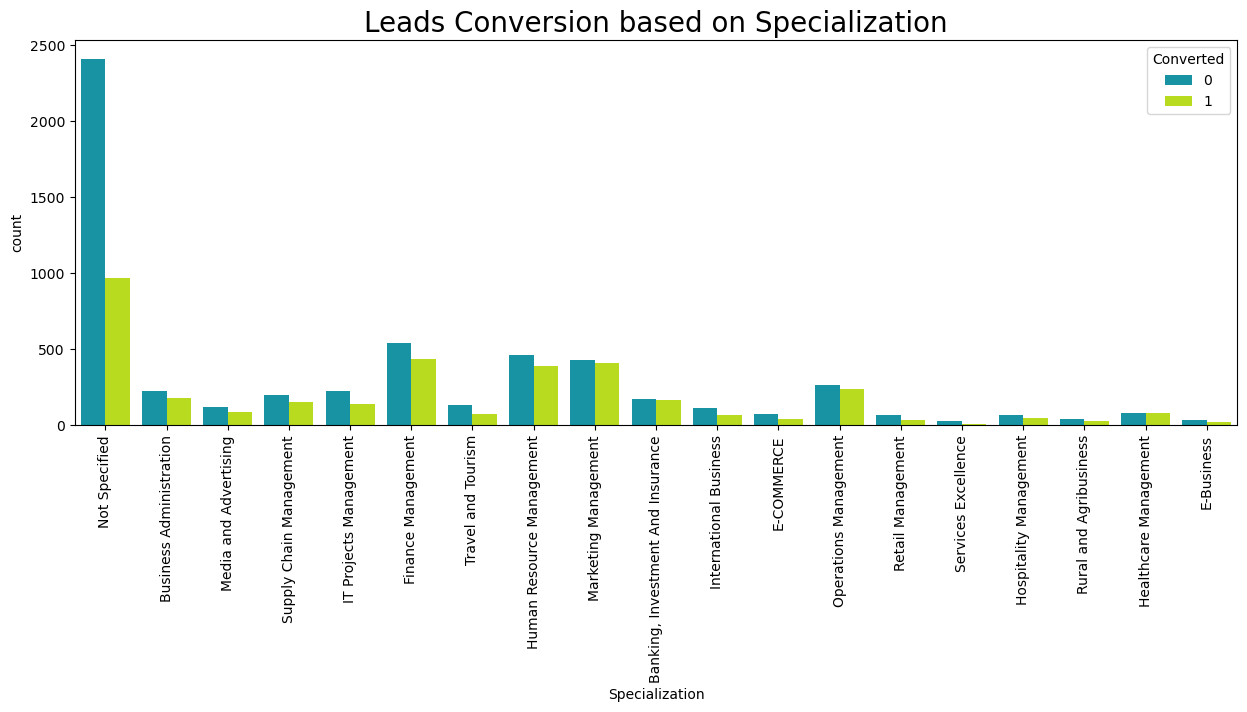

In [22]:
# Plotting the Specialization columnn 

plt.figure(figsize=(15, 5))
count_fig = sns.countplot(x='Specialization', hue='Converted', data=df, palette='nipy_spectral')
count_fig.set_xticklabels(count_fig.get_xticklabels(), rotation=90)
plt.title("Leads Conversion based on Specialization", fontsize=20)
plt.show()

Insights- 
1. Management has the higher number of leads converted

In [23]:
# Since Management is an import metric insde Specialisation, we could combine the entire Managements under one umbrella

df['Specialization'] = df['Specialization'].replace(['Finance Management','Human Resource Management',
                                                           'Marketing Management','Operations Management',
                                                           'IT Projects Management','Supply Chain Management',
                                                    'Healthcare Management','Hospitality Management',
                                                           'Retail Management'] ,'Management_Specializations')  

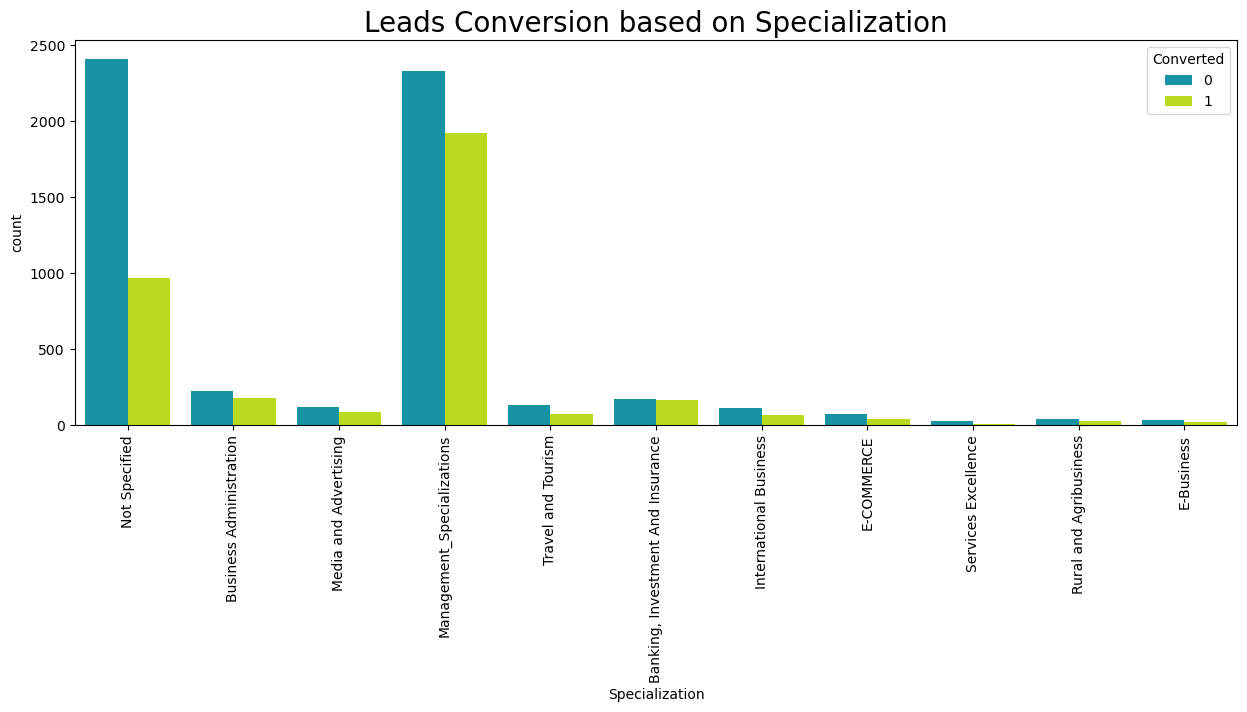

In [24]:
# Plotting Specialization column after consolidating the Management Sepcializations

plt.figure(figsize=(15, 5))
count_fig = sns.countplot(x='Specialization', hue='Converted', data=df, palette='nipy_spectral')
count_fig.set_xticklabels(count_fig.get_xticklabels(), rotation=90)
plt.title("Leads Conversion based on Specialization", fontsize=20)
plt.show()

In [25]:
# Checking percentage of Null values again
round(df.isna().sum().sort_values(ascending=False)/len(df)*100, 2)

Tags                                             36.29
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
TotalVisits                                       1.48
Page Views Per Visit                              1.48
Last Activity                                     1.11
Lead Source                                       0.39
Update me on Supply Chain Content                 0.00
Receive More Updates About Our Courses            0.00
Lead Origin                                       0.00
Digital Advertisement                             0.00
Get updates on DM Content                         0.00
City                                              0.00
I agree to pay the amount through cheque          0.00
A free copy of Mastering The Interview            0.00
Through Recommendations                           0.00
Magazine                                          0.00
Newspaper 

In [26]:
# Checking value count of column 'Tag'
df['Tags'].value_counts(dropna=False)

Tags
NaN                                                  3353
Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch 

Since the lead has not confirmed on the tag, we can impute Null values as "Not Specified"

In [27]:
# Replacing 'Nan values' in Tag with 'Not Specified'
df['Tags'] = df['Tags'].replace(np.nan,'Not Specified')

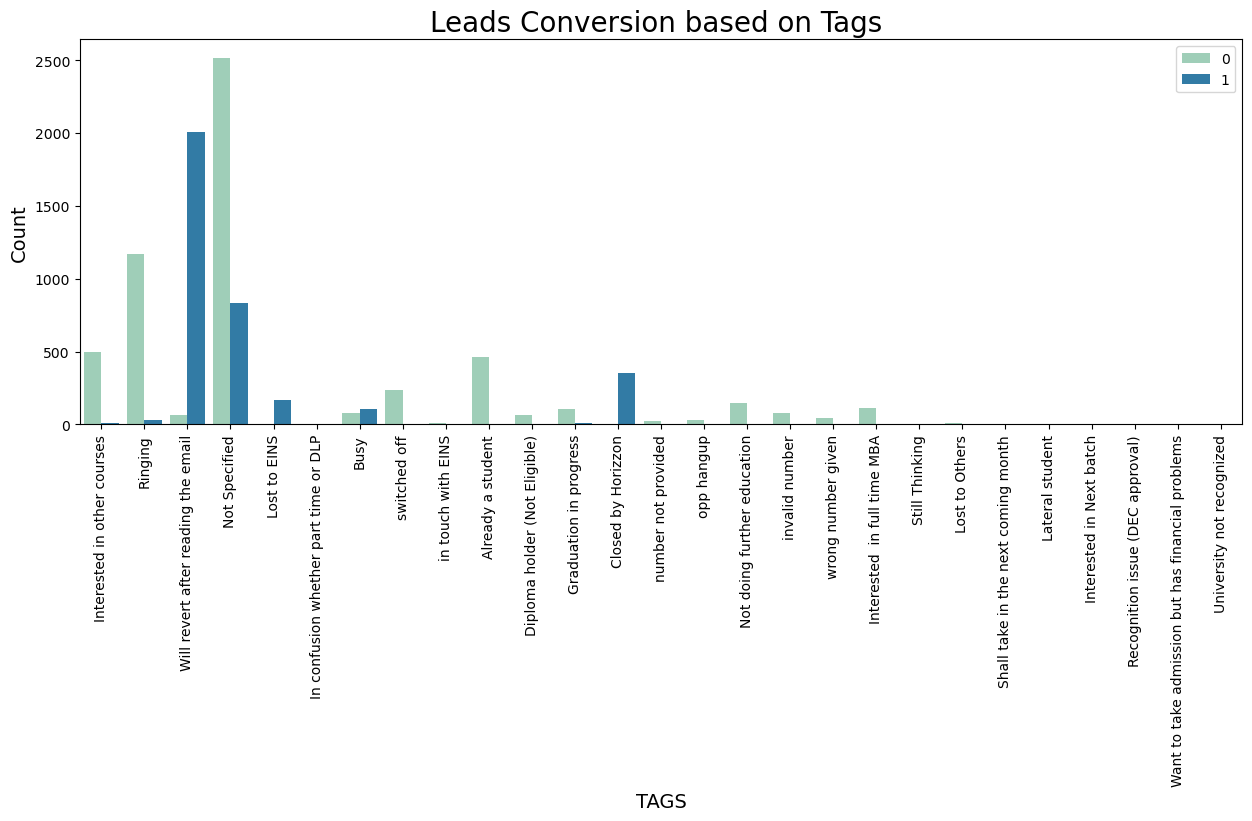

In [28]:
# Ploting on Tag variable
plt.figure(figsize=(15,5))
count_fig=sns.countplot(x='Tags', hue=df['Converted'], data = df, palette='YlGnBu')
count_fig.set_xticklabels(count_fig.get_xticklabels(),rotation=90)
plt.title("Leads Conversion based on Tags ",fontsize=20)
plt.xlabel("TAGS", fontsize=14)
plt.legend(loc=1)
plt.ylabel("Count", fontsize=14)
plt.show()

In [29]:
#Since some tags have very minimal values, we can replace them as "Other_Tags"
df['Tags'] = df['Tags'].replace(['In confusion whether part time or DLP', 'in touch with EINS','Diploma holder (Not Eligible)',
                                     'Approached upfront','Graduation in progress','number not provided', 'opp hangup','Still Thinking',
                                    'Lost to Others','Shall take in the next coming month','Lateral student','Interested in Next batch',
                                    'Recognition issue (DEC approval)','Want to take admission but has financial problems',
                                    'University not recognized','switched off','Already a student','Not doing further education',
                                     'invalid number','wrong number given','Interested  in full time MBA'], 'Other_Tags')


In [30]:
# Checking the column "What matters most to you in choosing a course"
df['What matters most to you in choosing a course'].value_counts(dropna=False)

What matters most to you in choosing a course
Better Career Prospects      6528
NaN                          2709
Flexibility & Convenience       2
Other                           1
Name: count, dtype: int64

In [31]:
df['What matters most to you in choosing a course'].mode()

0    Better Career Prospects
Name: What matters most to you in choosing a course, dtype: object

In [32]:
# Replacing Null values with Mode "Better Career Prospects"

df['What matters most to you in choosing a course'] = df['What matters most to you in choosing a course'].replace(np.nan,'Better Career Prospects')

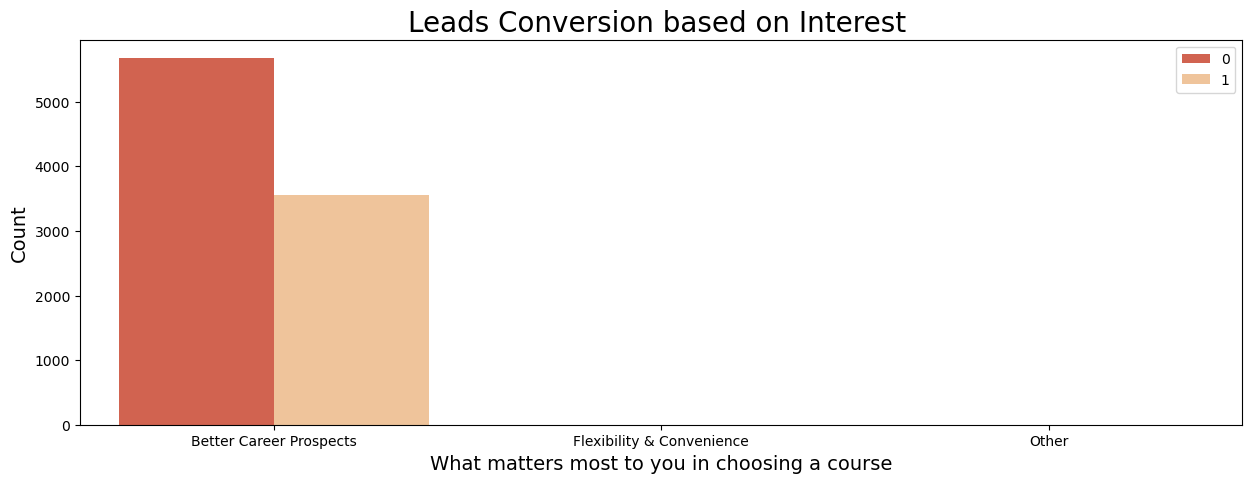

In [33]:
# Plotting column "What matters most to you in choosing a course"
plt.figure(figsize=(15,5))
count_fig=sns.countplot(x='What matters most to you in choosing a course', hue=df['Converted'], data = df, palette='OrRd_r')
count_fig.set_xticklabels(count_fig.get_xticklabels(),rotation=0)
plt.title("Leads Conversion based on Interest ",fontsize=20)
plt.xlabel("What matters most to you in choosing a course", fontsize=14)
plt.legend(loc=1)
plt.ylabel("Count", fontsize=14)
plt.show()

In [34]:
#checking Ratio of variable 
df['What matters most to you in choosing a course'].value_counts(dropna=False,normalize=True)*100

What matters most to you in choosing a course
Better Career Prospects      99.967532
Flexibility & Convenience     0.021645
Other                         0.010823
Name: proportion, dtype: float64

Column "What matters most to you in choosing a course" does not give us an insight as the data is biases towards "Better Career Prospects", so we can drop this column

In [35]:
df.drop('What matters most to you in choosing a course', axis=1,inplace=True)

In [36]:
# Checking percentage of Null values again
round(df.isna().sum().sort_values(ascending=False)/len(df)*100, 2)

What is your current occupation             29.11
Country                                     26.63
TotalVisits                                  1.48
Page Views Per Visit                         1.48
Last Activity                                1.11
Lead Source                                  0.39
Lead Origin                                  0.00
Digital Advertisement                        0.00
A free copy of Mastering The Interview       0.00
I agree to pay the amount through cheque     0.00
City                                         0.00
Get updates on DM Content                    0.00
Update me on Supply Chain Content            0.00
Tags                                         0.00
Receive More Updates About Our Courses       0.00
Through Recommendations                      0.00
Magazine                                     0.00
Newspaper                                    0.00
X Education Forums                           0.00
Newspaper Article                            0.00


In [37]:
# Checking column "What is your current occupation"

df['What is your current occupation'].value_counts(dropna=False)

What is your current occupation
Unemployed              5600
NaN                     2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: count, dtype: int64

In [38]:
# Replacing Null values with "Unemployed"

df['What is your current occupation'] = df['What is your current occupation'].replace(np.nan, 'Unemployed')

In [39]:
df['What is your current occupation'].value_counts(dropna=False)

What is your current occupation
Unemployed              8290
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: count, dtype: int64

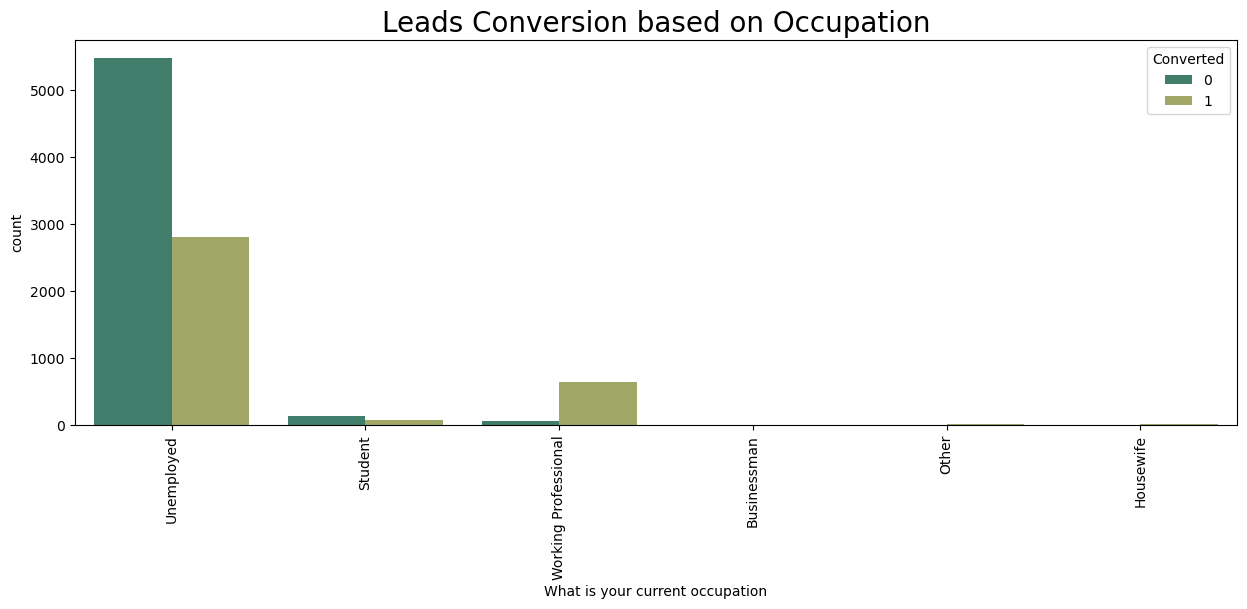

In [40]:
# Plotting the column "What is your current occupation"

plt.figure(figsize=(15,5))
count_fig=sns.countplot(x='What is your current occupation', hue=df['Converted'], data= df, palette='gist_earth')
count_fig.set_xticklabels(count_fig.get_xticklabels(),rotation=90)
plt.title("Leads Conversion based on Occupation",fontsize=20)
plt.show()

In [41]:
# Ratio of categories after imputation
df['What is your current occupation'].value_counts(dropna=False,normalize = True,ascending=False)*100

What is your current occupation
Unemployed              89.718615
Working Professional     7.640693
Student                  2.272727
Other                    0.173160
Housewife                0.108225
Businessman              0.086580
Name: proportion, dtype: float64

Insights-
1. There is a strong likelihood that working professionals will opt for the course.
2. The largest group among the leads consists of unemployed individuals.
3. Categories like housewives, businessmen, students, and others are less likely to convert and enroll in the course.

In [42]:
# Value counts of Country column

df['Country'].value_counts()

Country
India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
South Africa               4
Nigeria                    4
Germany                    4
Kuwait                     4
Canada                     4
Sweden                     3
China                      2
Asia/Pacific Region        2
Uganda                     2
Bangladesh                 2
Italy                      2
Belgium                    2
Netherlands                2
Ghana                      2
Philippines                2
Russia                     1
Switzerland                1
Vietnam                    1
Denmark                    1
Tanzania                   1
Liberia                    1
Malays

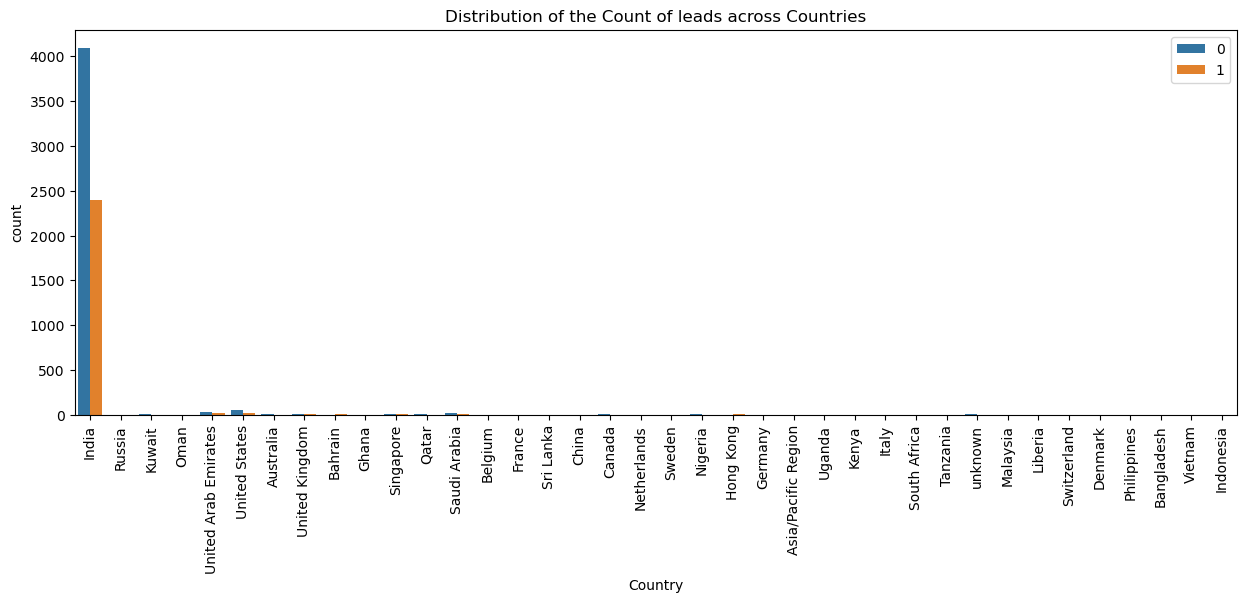

In [43]:
# Plotting the Country column
plt.figure(figsize=(15,5))
Count_fig=sns.countplot(x='Country', hue=df['Converted'], data = df)
Count_fig.set_xticklabels(Count_fig.get_xticklabels(),rotation=90)
plt.title("Distribution of the Count of leads across Countries")
plt.legend(loc=1)
plt.show()

In [44]:
# Checking mode in th Country Column 
df['Country'].mode()

0    India
Name: Country, dtype: object

In [45]:
# Replace null values with India
df['Country'] = df['Country'].replace(np.nan,'India')

In [46]:
df['Country'].value_counts()

Country
India                   8953
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
South Africa               4
Nigeria                    4
Germany                    4
Kuwait                     4
Canada                     4
Sweden                     3
China                      2
Asia/Pacific Region        2
Uganda                     2
Bangladesh                 2
Italy                      2
Belgium                    2
Netherlands                2
Ghana                      2
Philippines                2
Russia                     1
Switzerland                1
Vietnam                    1
Denmark                    1
Tanzania                   1
Liberia                    1
Malays

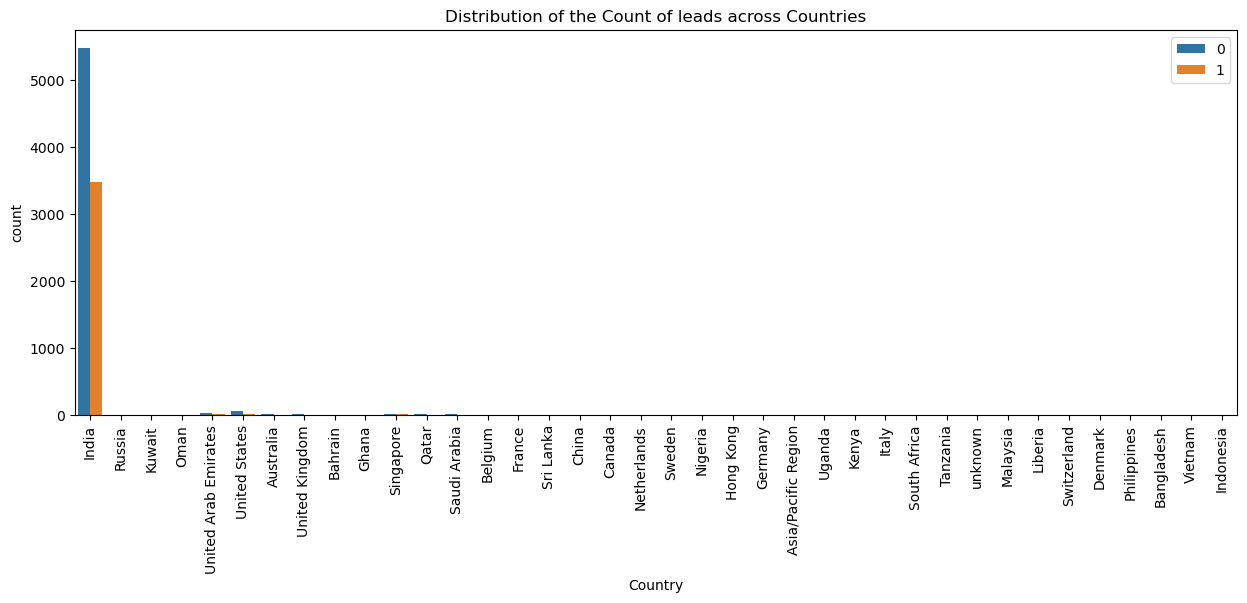

In [47]:
# Visualising the Country column after replacing NaN values
plt.figure(figsize=(15,5))
Count_fig=sns.countplot(x='Country', hue=df['Converted'], data = df)
Count_fig.set_xticklabels(Count_fig.get_xticklabels(),rotation=90)
plt.title("Distribution of the Count of leads across Countries")
plt.legend(loc=1)
plt.show()

Since "India" is tagged as the most occuring Country, it may not be suitable for an analysis - especially for a classification problem. Hence we can remove the Country column inorder to escape from the bias.

In [48]:
# Removing Country column frmom data
df.drop('Country',axis = 1,inplace=True)

In [49]:
# Checking percentage of Null values again
round(df.isna().sum().sort_values(ascending=False)/len(df)*100, 2)

TotalVisits                                 1.48
Page Views Per Visit                        1.48
Last Activity                               1.11
Lead Source                                 0.39
Lead Origin                                 0.00
Newspaper                                   0.00
A free copy of Mastering The Interview      0.00
I agree to pay the amount through cheque    0.00
City                                        0.00
Get updates on DM Content                   0.00
Update me on Supply Chain Content           0.00
Tags                                        0.00
Receive More Updates About Our Courses      0.00
Through Recommendations                     0.00
Digital Advertisement                       0.00
Newspaper Article                           0.00
X Education Forums                          0.00
Magazine                                    0.00
Search                                      0.00
What is your current occupation             0.00
Specialization      

In [50]:
# Checking value counts of Lead Source column
df['Lead Source'].value_counts(dropna=False)

Lead Source
Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
NaN                    36
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: count, dtype: int64

In [51]:
# Since 'Lead Source' has less 'NaN' values we can replace it with 'Others'
df['Lead Source'] = df['Lead Source'].replace(np.nan,'Others')

In [52]:
# Also we can combining low frequency values present in the Lead Source
df['Lead Source'] = df['Lead Source'].replace('google','Google')
df['Lead Source'] = df['Lead Source'].replace('Facebook','Social Media')
df['Lead Source'] = df['Lead Source'].replace(['bing','Click2call','Press_Release',
                                                     'youtubechannel','welearnblog_Home',
                                                     'WeLearn','blog','Pay per Click Ads',
                                                    'testone','NC_EDM'] ,'Others')                                                   

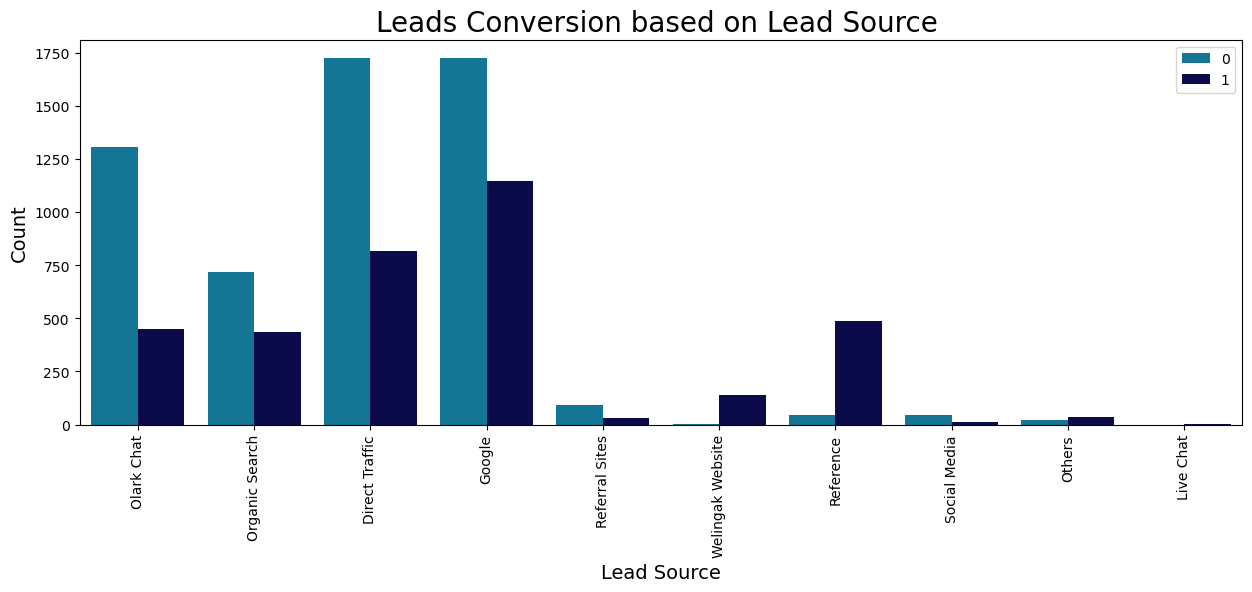

In [53]:
# Pltting on Lead Source variable
plt.figure(figsize=(15,5))
count_fig=sns.countplot(x='Lead Source', hue=df['Converted'], data=df, palette='ocean_r')
count_fig.set_xticklabels(count_fig.get_xticklabels(),rotation=90)
plt.title("Leads Conversion based on Lead Source ",fontsize=20)
plt.xlabel("Lead Source", fontsize=14)
plt.legend(loc=1)
plt.ylabel("Count", fontsize=14)
plt.show()

Insights-
1. The majority of leads are generated through Google and direct traffic, with the fewest coming from live chat.
2. The Welingak website has the highest conversion rate.
3. Improving lead conversion can be achieved by maximizing leads from references and the Welingak website.
4. Focusing on Olark chat, organic search, direct traffic, and Google leads could further boost lead conversion rates.

In [54]:
# Checking 'Last Activity' variable
df['Last Activity'].value_counts(dropna=False)

Last Activity
Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
NaN                              103
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: count, dtype: int64

In [55]:
# Converting Null values to "others"
df['Last Activity'] = df['Last Activity'].replace(np.nan,'Others')

In [56]:
# Replacing categories which are less than 1% to Others as it does not make much impact for analysis

df['Last Activity'] = df['Last Activity'].replace(['Unreachable','Unsubscribed',
                                                        'Had a Phone Conversation', 
                                                        'Approached upfront',
                                                        'View in browser link Clicked',       
                                                        'Email Marked Spam',                  
                                                        'Email Received','Resubscribed to emails',
                                                         'Visited Booth in Tradeshow'],'Others')

In [57]:
df['Last Activity'].value_counts(dropna=False)

Last Activity
Email Opened                 3437
SMS Sent                     2745
Olark Chat Conversation       973
Page Visited on Website       640
Converted to Lead             428
Email Bounced                 326
Others                        308
Email Link Clicked            267
Form Submitted on Website     116
Name: count, dtype: int64

In [58]:
# Checking percentage of Null values again
round(df.isna().sum().sort_values(ascending=False)/len(df)*100, 2)

TotalVisits                                 1.48
Page Views Per Visit                        1.48
Lead Origin                                 0.00
X Education Forums                          0.00
A free copy of Mastering The Interview      0.00
I agree to pay the amount through cheque    0.00
City                                        0.00
Get updates on DM Content                   0.00
Update me on Supply Chain Content           0.00
Tags                                        0.00
Receive More Updates About Our Courses      0.00
Through Recommendations                     0.00
Digital Advertisement                       0.00
Newspaper                                   0.00
Newspaper Article                           0.00
Lead Source                                 0.00
Magazine                                    0.00
Search                                      0.00
What is your current occupation             0.00
Specialization                              0.00
Last Activity       

In [59]:
# Few columns have less than 2% na values. We can afford to drop their respective rows altogehter. 
df = df.dropna()

In [60]:
round(df.isna().sum().sort_values(ascending=False)/len(df)*100, 2)

Lead Origin                                 0.0
Lead Source                                 0.0
A free copy of Mastering The Interview      0.0
I agree to pay the amount through cheque    0.0
City                                        0.0
Get updates on DM Content                   0.0
Update me on Supply Chain Content           0.0
Tags                                        0.0
Receive More Updates About Our Courses      0.0
Through Recommendations                     0.0
Digital Advertisement                       0.0
Newspaper                                   0.0
X Education Forums                          0.0
Newspaper Article                           0.0
Magazine                                    0.0
Search                                      0.0
What is your current occupation             0.0
Specialization                              0.0
Last Activity                               0.0
Page Views Per Visit                        0.0
Total Time Spent on Website             

In [61]:
print(len(df.index))
print(len(df.index)/9240)

9103
0.9851731601731601


After data cleaning, we have retained 98.51% of data.

In [62]:
# Checking the Lead Origin variable
df['Lead Origin'].value_counts(dropna=False)

Lead Origin
Landing Page Submission    4886
API                        3578
Lead Add Form               608
Lead Import                  31
Name: count, dtype: int64

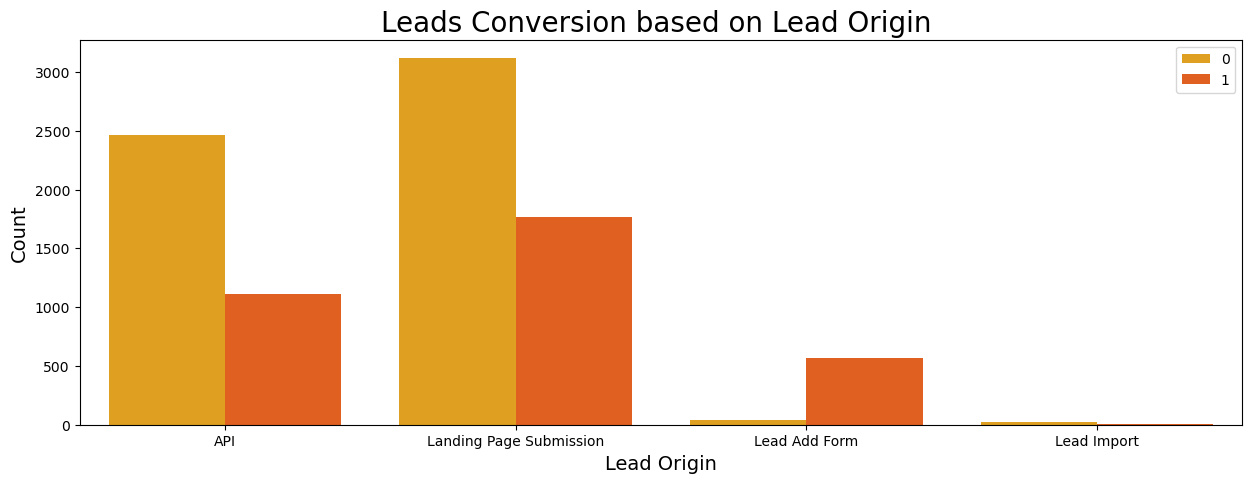

In [63]:
# Plotting count of Variable based on Converted value

plt.figure(figsize=(15,5))
count_fig=sns.countplot(x='Lead Origin', hue=df['Converted'], data = df, palette='autumn_r')
count_fig.set_xticklabels(count_fig.get_xticklabels(),rotation=0)
plt.title("Leads Conversion based on Lead Origin ",fontsize=20)
plt.xlabel("Lead Origin", fontsize=14)
plt.legend(loc=1)
plt.ylabel("Count", fontsize=14)
plt.show()

Insights-
1. Both API and landing page submissions generate a high volume of leads and conversions.
2. While the lead add form has a strong conversion rate, the number of leads it generates is relatively low.
3. Increasing the number of leads through the lead add form could significantly boost the overall conversion rate and contribute to greater growth.

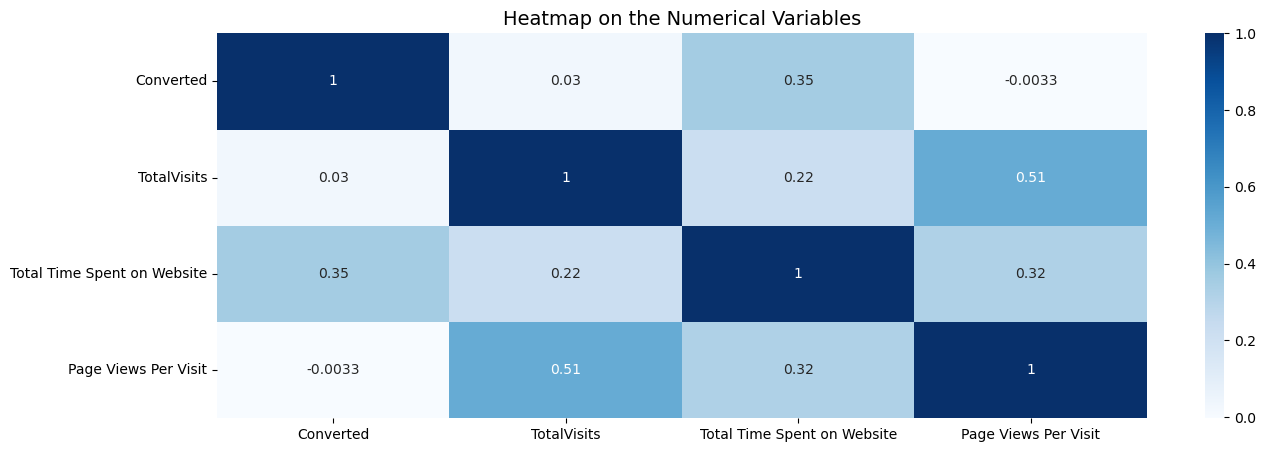

In [64]:
# Checking correlation through heatmap
plt.figure(figsize=(15,5))

# Selecting only numeric columns for correlation
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Plotting the heatmap
sns.heatmap(numeric_df.corr(), cmap="Blues", annot=True)
plt.title("Heatmap on the Numerical Variables", fontsize=14)
plt.show()


In [65]:
# Analysing the Total Time Spent on Website variable
df['Total Time Spent on Website'].describe()

count    9103.000000
mean      481.350104
std       545.066142
min         0.000000
25%         9.000000
50%       244.000000
75%       919.500000
max      2272.000000
Name: Total Time Spent on Website, dtype: float64